## Exercício do Módulo
Com base no módulo de Análise Exploratória dos Dados, analise e extraia da base disponível:
- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_netflix = pd.read_csv('dataset/netflix daily top 10.csv')

### Visualização do Dataframe

In [10]:
display(df_netflix)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


### Tipos de Dados Disponíveis

In [14]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [24]:
df_netflix.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

### Período da Análise Feita

In [16]:
## Periodo da analise da base de dados
df_netflix['As of'].min(), df_netflix['As of'].max()

('2020-04-01', '2022-03-11')

### Verificar dados nulos

In [17]:
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [ ]:
df_netflix['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
Name: count, dtype: int64

In [34]:
df_netflix.fillna({'Netflix Exclusive': 'No'}, inplace=True)

In [35]:
df_netflix['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
No     2501
Name: count, dtype: int64

### Análise Univariada

#### Hipóteses
- Conteúdos exclusivos da Netflix tendem a permanecer mais dias no Top 10 e ter um Viewership Score mais alto do que conteúdos não exclusivos.
- Conteúdos lançados recentemente tendem a ter um Viewership Score mais alto e permanecer mais dias no Top 10 em comparação com títulos mais antigos.


In [41]:
df_netflix['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
No     2501
Name: count, dtype: int64

In [42]:
df_netflix['Netflix Exclusive'].value_counts(normalize=True)

Netflix Exclusive
Yes    0.647746
No     0.352254
Name: proportion, dtype: float64

[Text(0, 0, '0.647746'), Text(0, 0, '0.352254')]

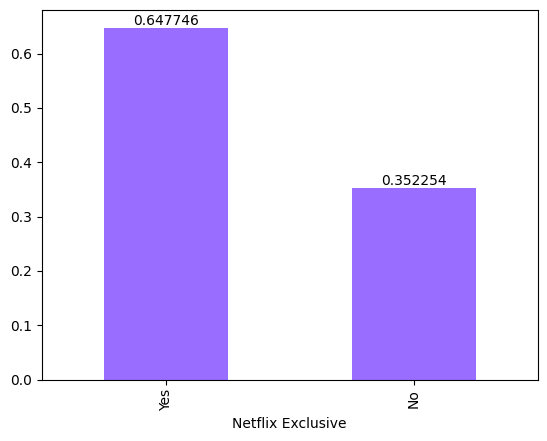

In [43]:
# Plot de distribuição Churn (Percentual)
ax = df_netflix['Netflix Exclusive'].value_counts(normalize=True).plot.bar(color=[ '#996dff'])
ax.bar_label(ax.containers[0])

In [47]:
df_netflix_exclusive = df_netflix[df_netflix['Netflix Exclusive'] == 'Yes']
df_netflix_non_exclusive = df_netflix[df_netflix['Netflix Exclusive'] == 'No']

In [48]:
df_netflix_exclusive.describe()

,Rank,Days In Top 10,Viewership Score
count,4599.00000,4599.000000,4599.000000
mean,5.01696,12.086106,88.664492
std,2.87437,13.122104,97.720286
min,1.00000,1.000000,1.000000
25%,2.00000,4.000000,21.000000
50%,5.00000,7.000000,53.000000
75%,7.00000,16.000000,120.000000
max,10.00000,89.000000,536.000000


In [49]:
df_netflix_non_exclusive.describe()

,Rank,Days In Top 10,Viewership Score
count,2501.000000,2501.000000,2501.000000
mean,6.388245,46.259096,185.542583
std,2.648774,92.928398,325.928621
min,1.000000,1.000000,1.000000
25%,4.000000,3.000000,15.000000
50%,7.000000,8.000000,44.000000
75%,9.000000,28.000000,167.000000
max,10.000000,428.000000,1474.000000


A média de Rank é menor para conteúdos exclusivos (5.02) em comparação com os não exclusivos (6.39), sugerindo que conteúdos exclusivos tendem a ter melhores posições no ranking.

A média de dias no Top 10 é significativamente maior para conteúdos não exclusivos (46.26) em comparação com exclusivos (12.09). Isso indica que os conteúdos não exclusivos têm maior permanência no Top 10, possivelmente por causa de séries e filmes populares de outras plataformas que atraem o público para a Netflix.

A média do Viewership Score é mais alta para os não exclusivos (185.54) comparada com os exclusivos (88.66), indicando que conteúdos não exclusivos tendem a atrair mais visualizações.

<Axes: >

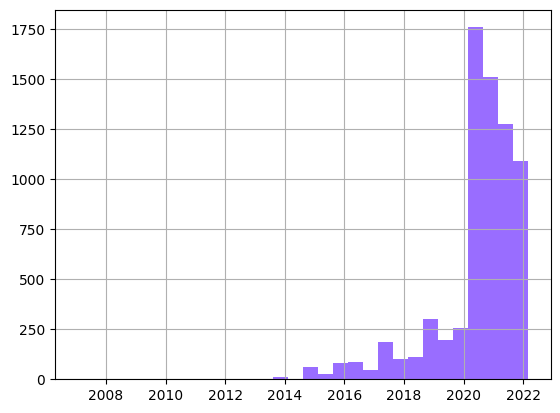

In [51]:
# Histograma de lançamento de conteúdos 
df_netflix['Netflix Release Date'].hist(bins=30, color='#996dff')

In [52]:
# Converte a coluna para formato de data
df_netflix['Netflix Release Date'] = pd.to_datetime(df_netflix['Netflix Release Date'], errors='coerce')
# Cria uma nova coluna com apenas o ano de lançamento
df_netflix['Release Year'] = df_netflix['Netflix Release Date'].dt.year

In [53]:
# Agrupa os dados por ano de lançamento e calcula a média de Days In Top 10
avg_days_by_year = df_netflix.groupby('Release Year')['Days In Top 10'].mean()

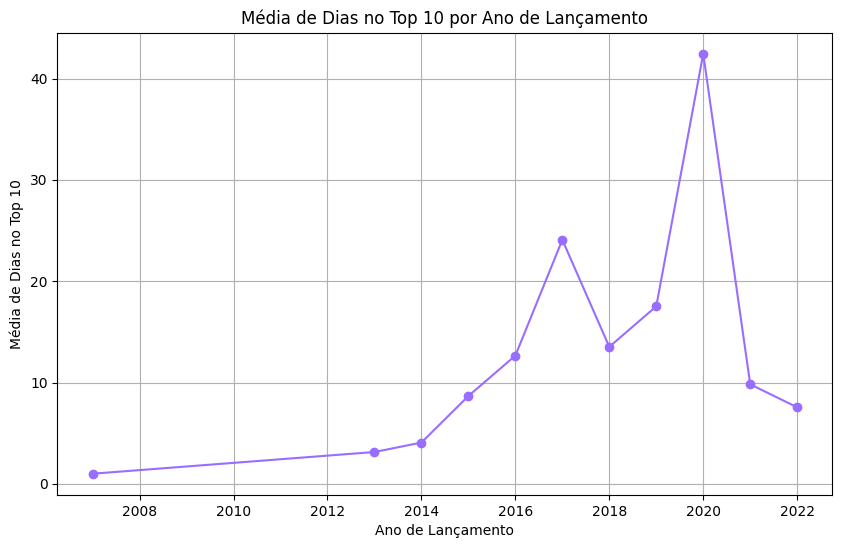

In [54]:
# Plota a média de dias no Top 10 por ano de lançamento
plt.figure(figsize=(10, 6))
avg_days_by_year.plot(kind='line', marker='o', color='#996dff')
plt.title('Média de Dias no Top 10 por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média de Dias no Top 10')
plt.grid(True)
plt.show()

O gráfico demonstra um aumento acentuado na média de dias no Top 10 para lançamentos da Netflix ao longo dos anos, com um pico significativo em 2020. Esse comportamento provavelmente não é coincidência e pode estar diretamente relacionado ao contexto histórico da pandemia de COVID-19.

Em 2020, com a implementação de medidas de isolamento social em diversos países, o consumo de conteúdo digital cresceu substancialmente, uma vez que as pessoas buscaram alternativas de entretenimento dentro de casa. Plataformas de streaming, como a Netflix, se beneficiaram desse cenário, com mais pessoas dedicando tempo a assistir a séries, filmes e documentários. Esse aumento na demanda por conteúdo também pode ter contribuído para que lançamentos de 2020 permanecessem mais tempo no Top 10, devido ao maior volume de visualizações e engajamento da audiência.

Análise Bivariada

Outliers